In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [43]:
noOfData = 200
nx, ny = 50, 40

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

def posteriorPlot(nx,ny,m1,m2,P1,P2,C1,C2=None):
    if C2 is None:
        C2 = C1
    x = np.linspace(-5,5,nx)
    y = np.linspace(-5,5,ny)
    X,Y = np.meshgrid(x,y,indexing="ij")
    
    Z = np.zeros([nx,ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j],Y[i,j]])
            num = P1 * gauss2D(xvec,m1,C1)
            den = P1 * gauss2D(xvec,m1,C1) + P2 * gauss2D(xvec,m2,C2)

            Z[i,j] = num/den
    return X,Y,Z


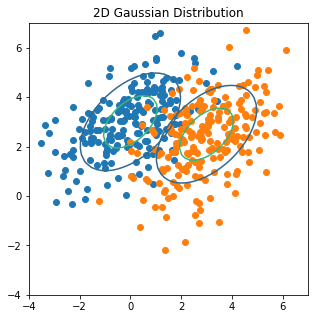

In [46]:
m1 = np.array([0,3])
m2 = np.array([3,2.5])
c1=c2=([2,1],[1,2])
p1=p2=0.5

A1= np.linalg.cholesky(c1)

U1 = np.random.randn(noOfData, 2)
X1 = U1 @ A1.T + m1

U2 = np.random.randn(noOfData, 2)
X2 = U2 @ A1.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-4,7)
ax.set_ylim(-4,7)
ax.scatter(X1[:,0], X1[:,1])
ax.scatter(X2[:,0], X2[:,1])

ax.set_title("2D Gaussian Distribution", fontsize=12)

X1p, Y1p, Z1p = twoDGaussianPlot (nx, ny, m1, c1)
plt.contour(X1p, Y1p, Z1p, 2)

X1p, Y1p, Z1p = twoDGaussianPlot (nx, ny, m2, c2)
plt.contour(X1p, Y1p, Z1p, 2)

plt.savefig("GaussianDistribution1", bbox_inches="tight")

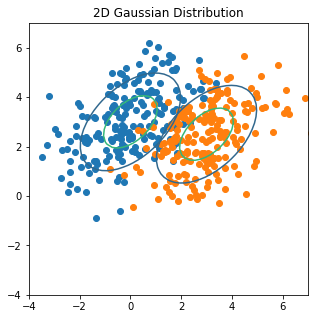

In [47]:
m3 = np.array([0,3])
m4 = np.array([3,2.5])
c3=c4=([2,1],[1,2])
p3 = 0.7
p4 = 0.3

A2 = np.linalg.cholesky(c3)

U1 = np.random.randn(noOfData, 2)
X3 = U1 @ A2.T + m3

U2 = np.random.randn(noOfData, 2)
X4 = U2 @ A2.T + m4

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-4,7)
ax.set_ylim(-4,7)
ax.set_title("2D Gaussian Distribution", fontsize=12)

ax.scatter(X3[:,0], X3[:,1])
ax.scatter(X4[:,0], X4[:,1])

X2p, Y2p, Z2p = twoDGaussianPlot (nx, ny, m3, c3)
plt.contour(X2p, Y2p, Z2p, 2)

X2p, Y2p, Z2p = twoDGaussianPlot (nx, ny, m4, c4)
plt.contour(X2p, Y2p, Z2p, 2)
plt.savefig("GaussianDistribution2", bbox_inches="tight")

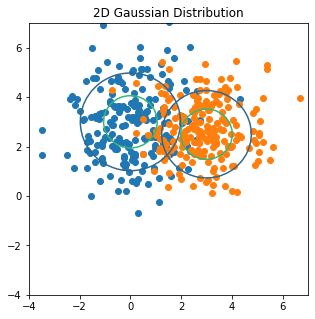

In [48]:
m5 = np.array([0,3])
m6 = np.array([3,2.5])
c5 = ([2,0],[0,2])
c6 = ([1.5,0],[0,1.5])
p5 = p6 = 0.6

A3 = np.linalg.cholesky(c5)
A4 = np.linalg.cholesky(c6)

U1 = np.random.randn(noOfData, 2)
X5 = U1 @ A3.T + m5

U2 = np.random.randn(noOfData, 2)
X6 = U2 @ A4.T + m6

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-4,7)
ax.set_ylim(-4,7)
ax.set_title("2D Gaussian Distribution", fontsize=12)

ax.scatter(X5[:,0], X5[:,1])
ax.scatter(X6[:,0], X6[:,1])

X3p, Y3p, Z3p = twoDGaussianPlot (nx, ny, m5, c5)
plt.contour(X3p, Y3p, Z3p, 2)

X3p, Y3p, Z3p = twoDGaussianPlot (nx, ny, m6, c6)
plt.contour(X3p, Y3p, Z3p, 2)
plt.savefig("GaussianDistribution3", bbox_inches="tight")

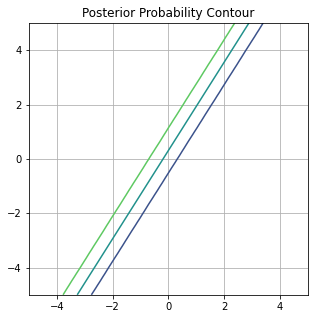

In [49]:
X1p,Y1p,Z1p = posteriorPlot(nx,ny,m1,m2,0.5,0.5,c1)
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("Posterior Probability Contour", fontsize=12)
plt.contour(X1p, Y1p, Z1p,3)
plt.grid(True)
plt.savefig("PosteriorProbability1", bbox_inches="tight")

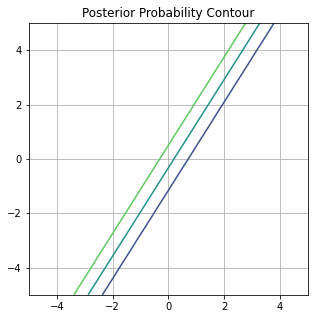

In [54]:
X2p,Y2p,Z2p = posteriorPlot(nx,ny,m3,m4,0.7,0.3,c3)
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("Posterior Probability Contour", fontsize=12)
plt.contour(X2p, Y2p, Z2p,3)
plt.grid(True)
plt.savefig("PosteriorProbability2", bbox_inches="tight")

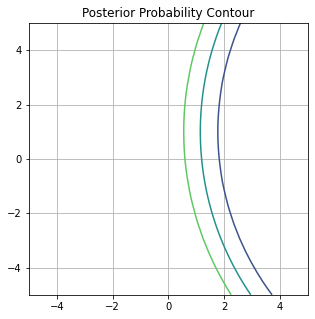

In [51]:
X2p,Y2p,Z2p = posteriorPlot(nx,ny,m3,m4,0.5,0.5,c5, c6)
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("Posterior Probability Contour", fontsize=12)
plt.contour(X2p, Y2p, Z2p,3)
plt.grid(True)
plt.savefig("PosteriorProbability3", bbox_inches="tight")

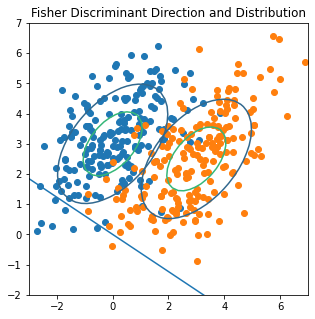

In [58]:
NoOfData = 200
m1 = np.array([0,3])
m2 = np.array([3,2.5])
c1=c2=np.array([[2,1],[1,2]], np.float32)
              
A = np.linalg.cholesky(c1)
              
              
U1 = np.random.randn(NoOfData, 2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NoOfData, 2)
X2 = U2 @ A.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-3,7)
ax.set_ylim(-2,7)
ax.set_title("Fisher Discriminant Direction and Distribution", fontsize=12)

ax.scatter(X1[:,0], X1[:,1])
ax.scatter(X2[:,0], X2[:,1])

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, c1)
plt.contour(Xp, Yp, Zp, 2)

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m2, c1)
plt.contour(Xp, Yp, Zp, 2)

Ci = np.linalg.inv(c1+c2)
uF = Ci @ (m2-m1)
ls = np.linspace(-5,7)
plt.plot(ls,ls*uF[1]/uF[0])

plt.savefig("FisherDiscriminateAndDistribution", bbox_inches="tight")

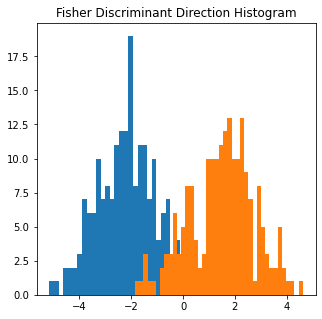

In [59]:

# Fisher discriminant direction (snippet 2)

Ci = np.linalg.inv(c1+c2)
uF = Ci @ (m2-m1)
yp1 = X1 @ uF
yp2 = X2 @ uF

fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("Fisher Discriminant Direction Histogram", fontsize=12)

plt.hist(yp1,bins=40)
plt.hist(yp2,bins=40)

plt.savefig("FisherDiscriminateHisto", bbox_inches="tight")

-5.164732305471952 4.623180934642703


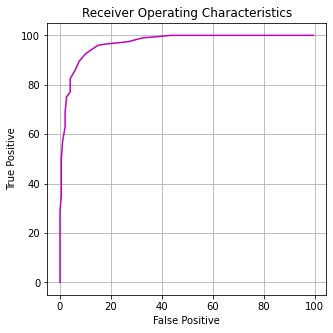

In [76]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
    FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
    ROC[i,:] = [TP, FP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('FisherrocCurve.png')

In [13]:
print( np.trapz(ROC[:,0],ROC[:,1]) )

-9630.625


[-0.69484832  0.27403417]
-9578.875


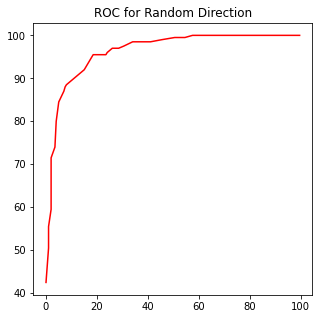

In [82]:
randDir = np.random.uniform(1,-1,size=2) # [0.17621282 0.50578395]
# randDir = m1-m2 # Difference of means
print(randDir)
yp3 = X1 @ randDir
yp4 = X2 @ randDir
pmin2 = np.min( np.array((np.min(yp3),np.min(yp4))) )
pmax2 = np.min( np.array((np.max(yp3),np.max(yp4))) )
thRange = np.linspace(pmin2,pmax2,nRocPoints)
ROC2 = np.zeros((nRocPoints,2))
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp3[yp3>thresh]) * 100 / len(yp3)
    FP = len(yp4[yp4>thresh]) * 100 / len(yp4)
    ROC2[i,:] = [TP,FP]
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('ROC for Random Direction')
ax.plot(ROC2[:,1],ROC2[:,0], c="r",label="ROC for random direction " + r"($y=0.3484 x$)")
plt.savefig('RandomrocCurve.png')
print( np.trapz(ROC2[:,0],ROC2[:,1]) )

[-3.   0.5]
-9395.5


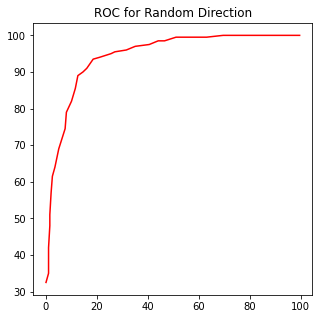

In [78]:
randDir = m1-m2 # Difference of means
print(randDir)
yp3 = X1 @ randDir
yp4 = X2 @ randDir
pmin2 = np.min( np.array((np.min(yp3),np.min(yp4))) )
pmax2 = np.min( np.array((np.max(yp3),np.max(yp4))) )
thRange = np.linspace(pmin2,pmax2,nRocPoints)
ROC3 = np.zeros((nRocPoints,2))
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp3[yp3>thresh]) * 100 / len(yp3)
    FP = len(yp4[yp4>thresh]) * 100 / len(yp4)
    ROC3[i,:] = [TP,FP]
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('ROC for Random Direction')
ax.plot(ROC3[:,1],ROC3[:,0], c="r",label="ROC for random direction " + r"($y=0.3484 x$)")
plt.savefig('RandomrocCurve.png')
print( np.trapz(ROC3[:,0],ROC3[:,1]) )

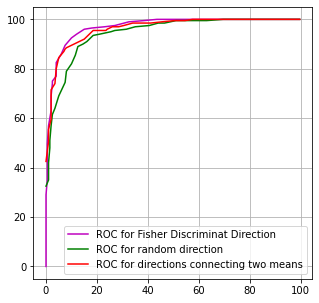

In [98]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(ROC[:,1], ROC[:,0], c='m', label="ROC for Fisher Discriminat Direction")
ax.plot(ROC3[:,1],ROC3[:,0], c='g', label="ROC for random direction")
ax.plot(ROC2[:,1],ROC2[:,0], c='r', label="ROC for directions connecting two means")
ax.grid(True)
plt.legend(loc='lower right',prop={'size': 10})
plt.savefig('ROCCurveFor3Cases.png')

In [100]:
 #AUC for Fisher Discriminat Direction 
print("AUC for Fisher Discriminat Direction: " ,np.trapz(ROC[:,0],ROC[:,1]) )

#AUC for random direction 
print("AUC for random direction: " ,np.trapz(ROC3[:,0],ROC3[:,1]) )

 #AUC for directions connecting two means 
print("AUC for directions connecting two means: " ,np.trapz(ROC2[:,0],ROC2[:,1]) )

AUC for Fisher Discriminat Direction:  -9647.625
AUC for random direction:  -9395.5
AUC for directions connecting two means:  -9578.875


In [16]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
yh_train = model.predict(X_train)
print("Accuracy on training set: %6.2f" %(accuracy_score(yh_train, Y_train)))
yh_test = model.predict(X_test)
print("Accuracy on test set: %6.2f" %(accuracy_score(yh_test, Y_test)))
if (accuracy_score(yh_test, Y_test) > 0.99):
    print("Wow, Perfect Classification on Separable dataset!")

NameError: name 'LinearDiscriminantAnalysis' is not defined

-5.164732305471952 2.027209027135566
[-3.   0.5]
-9650.375
-9395.5


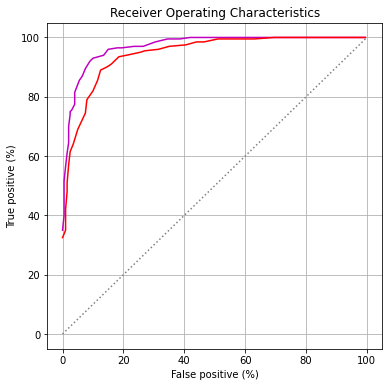

In [64]:
pmin = np.min( np.array((np.min(yp1),np.min(yp2))) )
pmax = np.min( np.array((np.max(yp1),np.max(yp2))) )
print(pmin,pmax)

# Set up an array of thresholds
nRocPoints = 50
thRange = np.linspace(pmin,pmax,nRocPoints)
ROC = np.zeros((nRocPoints,2))

# Compute tp and fp at each threshold
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2>thresh]) * 100 / len(yp2)
    FP = len(yp1[yp1>thresh]) * 100 / len(yp1)
    ROC[i,:] = [TP,FP]
    
# Plot ROC curve
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1],ROC[:,0], c="m",label="ROC for Fisher discriminant " + r'($y=-1.625 x$)')
ax.plot(np.linspace(0,100),np.linspace(0,100),c="gray",linestyle=":")
ax.set_xlabel("False positive (%)")
ax.set_ylabel("True positive (%)")
ax.set_title("Receiver Operating Characteristics")
ax.grid(True)

print(randDir)
yp3 = X1 @ randDir
yp4 = X2 @ randDir
pmin2 = np.min( np.array((np.min(yp3),np.min(yp4))) )
pmax2 = np.min( np.array((np.max(yp3),np.max(yp4))) )
thRange = np.linspace(pmin2,pmax2,nRocPoints)
ROC2 = np.zeros((nRocPoints,2))
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp3[yp3>thresh]) * 100 / len(yp3)
    FP = len(yp4[yp4>thresh]) * 100 / len(yp4)
    ROC2[i,:] = [TP,FP]
ax.plot(ROC2[:,1],ROC2[:,0], c="r",label="ROC for random direction " + r"($y=0.3484 x$)")
# ax.fill_between(ROC[:,1],ROC[:,0],0,alpha=0.2,color="m",label="AUROC (Fisher) = 9305")
# ax.fill_between(ROC2[:,1],0,ROC2[:,0],alpha=0.6,facecolor="none",
#                 edgecolor='r',hatch="\\\\",linewidth=0.0,
#                 label="AUROC (Random) = 3667")
# plt.legend(loc='lower right',prop={'size': 10})

print( np.trapz(ROC[:,0],ROC[:,1]) )
print( np.trapz(ROC2[:,0],ROC2[:,1]) )

In [97]:
from scipy.spatial.distance import mahalanobis as mahal
a= [mahal(i,m5,np.linalg.inv(c5)) for i in X5]
b=[mahal(i,m6,np.linalg.inv(c6)) for i in X6]
yp7 = np.array([mahal(i,m5,np.linalg.inv(c5)) for i in X5])
yp8 = np.array([mahal(i,m6,np.linalg.inv(c6)) for i in X6])

ax.scatter(a[:,0],a[:,1])
ax.scatter(b[:,0],a[:,1])

#print(yp1)
#print("AA")
#print(yp7)
# Define range over which to slide a threshold
# pmin = np.min( np.array((np.min(yp7),np.min(yp8))) )
# pmax = np.min( np.array((np.max(yp7),np.max(yp8))) )
# print(pmin,pmax)

# # Set up an array of thresholds
# nRocPoints = 50
# thRange = np.linspace(pmin,pmax,nRocPoints)
# ROC = np.zeros((nRocPoints,2))

# # Compute tp and fp at each threshold
# '''for i in range(len(thRange)):
#     thresh = thRange[i]
#     TP, FP = 0,0
#     for i in range(len(X)):
#         if mahal(X[i],m1,np.linalg.inv(C))>thresh:
#             TP += 1
#         if mahal(Y[i],m1,np.linalg.inv(C))>thresh:
#             FP += 1
#     TP = TP * 100 / len(X)
#     FP = FP * 100 / len(Y)
#     print([TP,FP])
#     print("A")
#     ROC[i,:] = [TP,FP]'''
# for i in range(len(thRange)):
#     thresh = thRange[i]
#     TP = len(yp8[yp8>thresh]) * 100 / len(yp8)
#     FP = len(yp7[yp7>thresh]) * 100 / len(yp7)
#     ROC[i,:] = [TP,FP]
    
    
# # Plot ROC curve
# fig,ax = plt.subplots(figsize=(6,6))
# ax.plot(ROC[:,1],ROC[:,0], c="g",label="ROC for Mahalanobis classifier")
# ax.plot(np.linspace(0,100),np.linspace(0,100),c="gray",linestyle=":")
# ax.set_xlabel("False positive (%)")
# ax.set_ylabel("True positive (%)")
# ax.set_title("Receiver Operating Characteristics")
# ax.grid(True)

TypeError: list indices must be integers or slices, not tuple

m3 = np.array([0,3])
m4 = np.array([3,1])
c3=c4=([1,0],[0,1])
p3 = 0.7
p4 = 0.3

A2 = np.linalg.cholesky(c3)

U1 = np.random.randn(100, 2)
X3 = U1 @ A2.T + m3

U2 = np.random.randn(100, 2)
X4 = U2 @ A2.T + m4

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-4,7)
ax.set_ylim(-4,7)
ax.set_title("Distance to mean classifier", fontsize=12)

ax.scatter(X3[:,0], X3[:,1])
ax.scatter(X4[:,0], X4[:,1])
plt.savefig("DistanceToMeanClassifier.png")

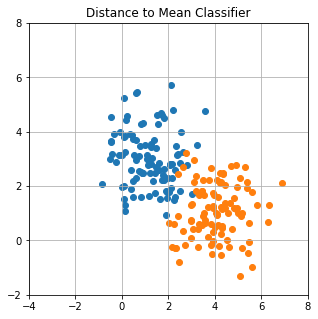

In [130]:
m1 = np.array([1,3])
m2 = np.array([4,1])
c1=c2=([1,0],[0,1])
p1=p2=0.5

A1= np.linalg.cholesky(c1)

U1 = np.random.randn(100, 2)
X1 = U1 @ A1.T + m1

U2 = np.random.randn(100, 2)
X2 = U2 @ A1.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-4,8)
ax.set_ylim(-2,8)
ax.scatter(X1[:,0], X1[:,1])
ax.scatter(X2[:,0], X2[:,1])
ax.grid(True)

ax.set_title("Distance to Mean Classifier", fontsize=12)
plt.savefig("DistanceToMeanClassifier.png")

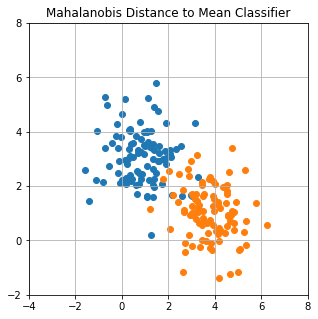

In [129]:
m1 = np.array([1,3])
m2 = np.array([4,1])
c1=c2=([1,0],[0,1])
p1=p2=0.5

A1= np.linalg.cholesky(c1)

U1 = np.random.randn(100, 2)
X1 = U1 @ A1.T + m1

U2 = np.random.randn(100, 2)
X2 = U2 @ A1.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-4,8)
ax.set_ylim(-2,8)
ax.scatter(X1[:,0], X1[:,1])
ax.scatter(X2[:,0], X2[:,1])
ax.grid(True)

ax.set_title("Mahalanobis Distance to Mean Classifier", fontsize=12)
plt.savefig("MahalanobisDistanceToMeanClassifier.png")